In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.shape

(2392, 15)

In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [7]:
df.corr()['GradeClass']

StudentID           -0.098500
Age                 -0.006250
Gender               0.022998
Ethnicity           -0.023326
ParentalEducation    0.041031
StudyTimeWeekly     -0.134131
Absences             0.728633
Tutoring            -0.111695
ParentalSupport     -0.136823
Extracurricular     -0.069733
Sports              -0.026654
Music               -0.036065
Volunteering         0.013156
GPA                 -0.782835
GradeClass           1.000000
Name: GradeClass, dtype: float64

In [8]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.duplicated().sum()

0

# **EDA**

In [10]:
df.sample(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2347,3348,16,1,1,2,13.434897,4,0,3,0,0,1,0,2.992912,4.0
1873,2874,16,0,0,1,10.334721,22,0,0,0,1,0,0,0.833079,4.0
1791,2792,16,0,0,2,14.725598,12,0,3,1,1,0,0,2.474040,3.0
482,1483,15,1,2,1,9.539838,9,0,2,0,0,0,0,2.520175,2.0
1322,2323,15,0,3,2,3.402855,4,0,1,1,1,1,1,2.517229,2.0


In [11]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.000000,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.000000,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.000000,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.000000,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.000000,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.000000,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.000000,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.000000,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.000000,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.000000,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


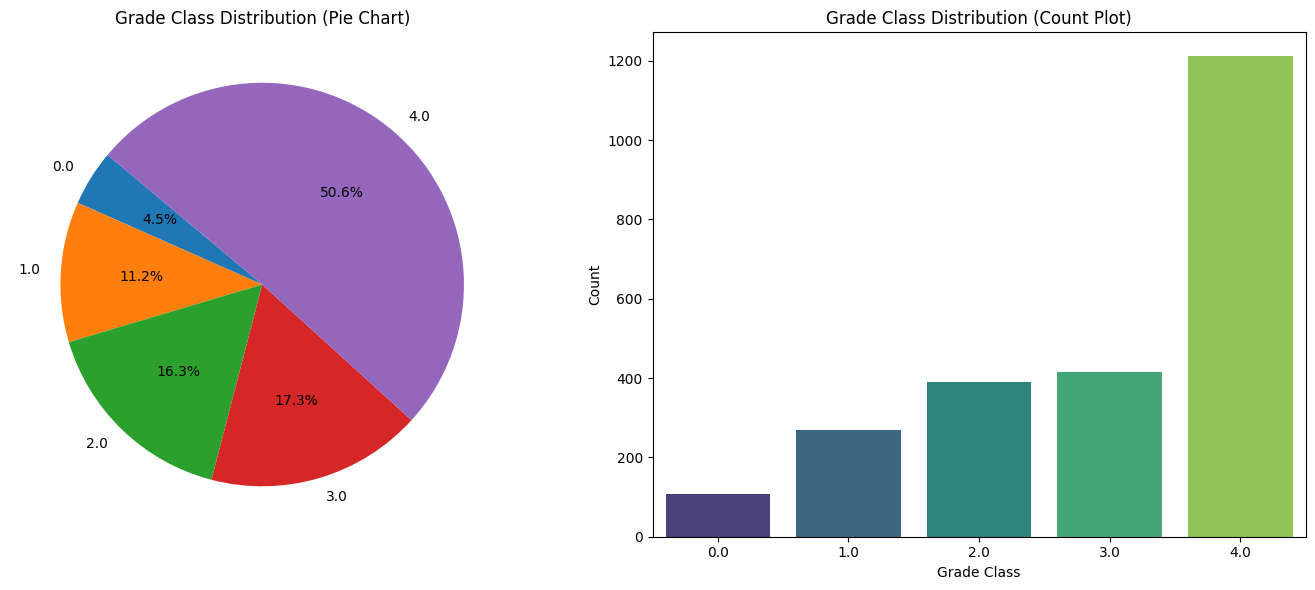

In [12]:
grade_counts = df['GradeClass'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Grade Class Distribution (Pie Chart)')
sns.countplot(x='GradeClass', data=df, ax=ax2, palette='viridis')
ax2.set_title('Grade Class Distribution (Count Plot)')
ax2.set_xlabel('Grade Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

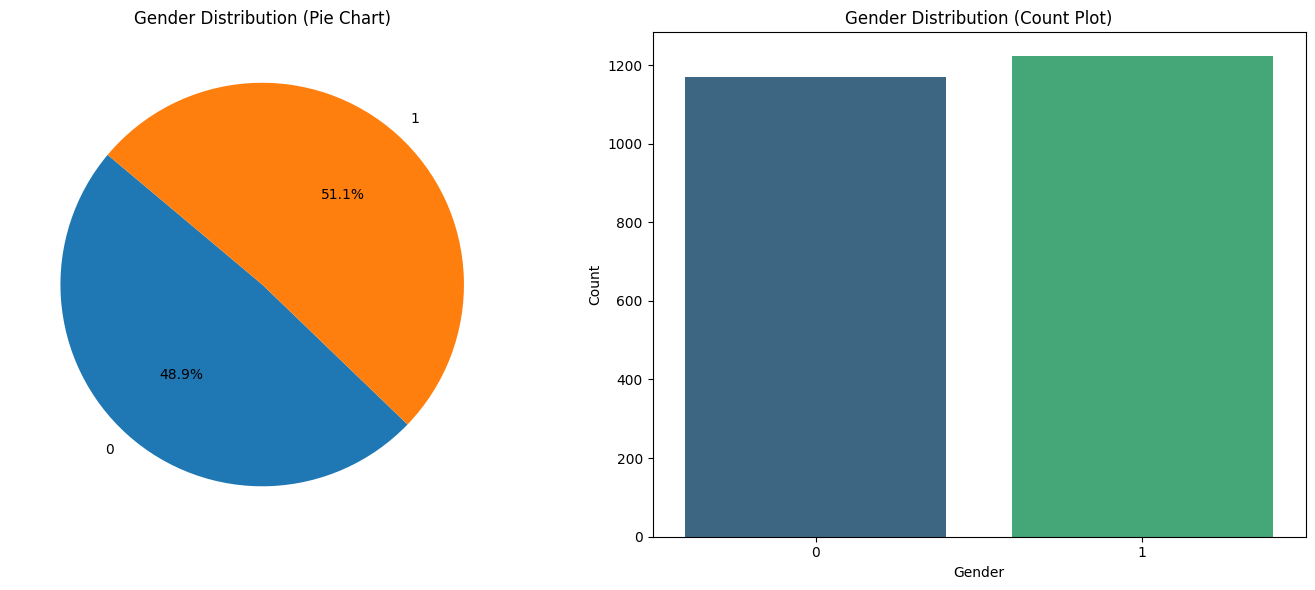

In [13]:
gender = df['Gender'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Gender Distribution (Pie Chart)')
sns.countplot(x='Gender', data=df, ax=ax2, palette='viridis')
ax2.set_title('Gender Distribution (Count Plot)')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

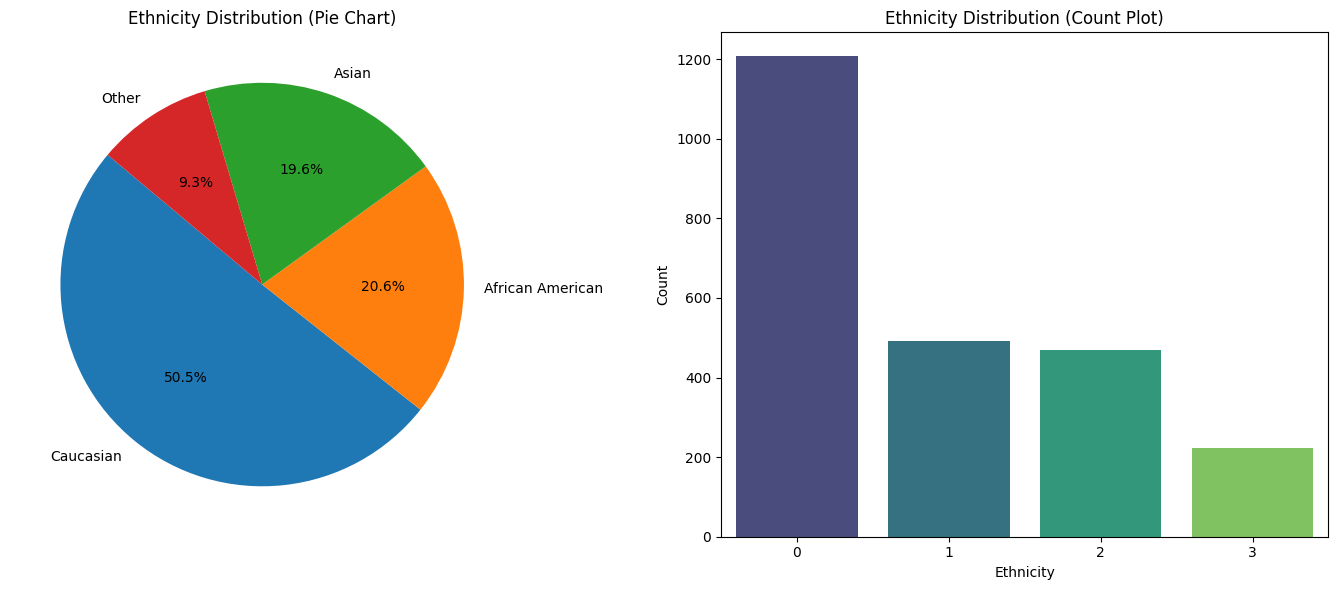

In [14]:
ethnicity = df['Ethnicity'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(ethnicity, autopct='%1.1f%%', startangle=140, labels=['Caucasian', 'African American', 'Asian', 'Other'])
ax1.set_title('Ethnicity Distribution (Pie Chart)')
sns.countplot(x='Ethnicity', data=df, ax=ax2, palette='viridis')
ax2.set_title('Ethnicity Distribution (Count Plot)')
ax2.set_xlabel('Ethnicity')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

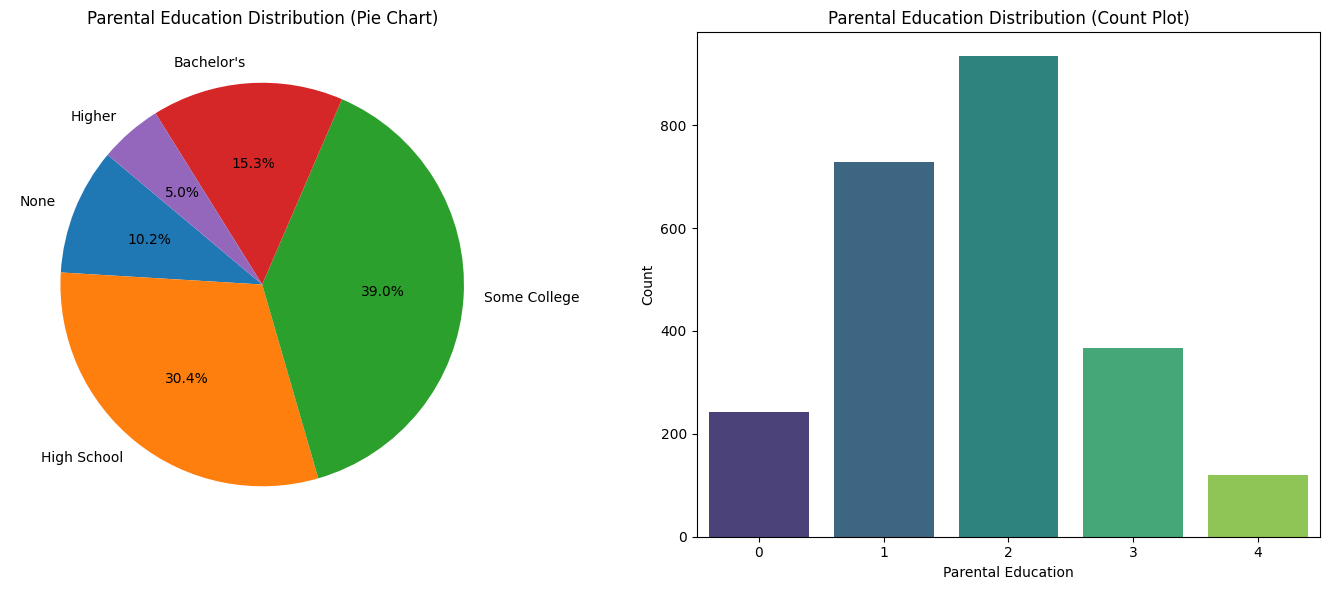

In [15]:
parental_education = df['ParentalEducation'].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(parental_education, autopct='%1.1f%%', startangle=140, labels=['None', 'High School', 'Some College', "Bachelor's", 'Higher'])
ax1.set_title('Parental Education Distribution (Pie Chart)')
sns.countplot(x='ParentalEducation', data=df, ax=ax2, palette='viridis')
ax2.set_title('Parental Education Distribution (Count Plot)')
ax2.set_xlabel('Parental Education')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

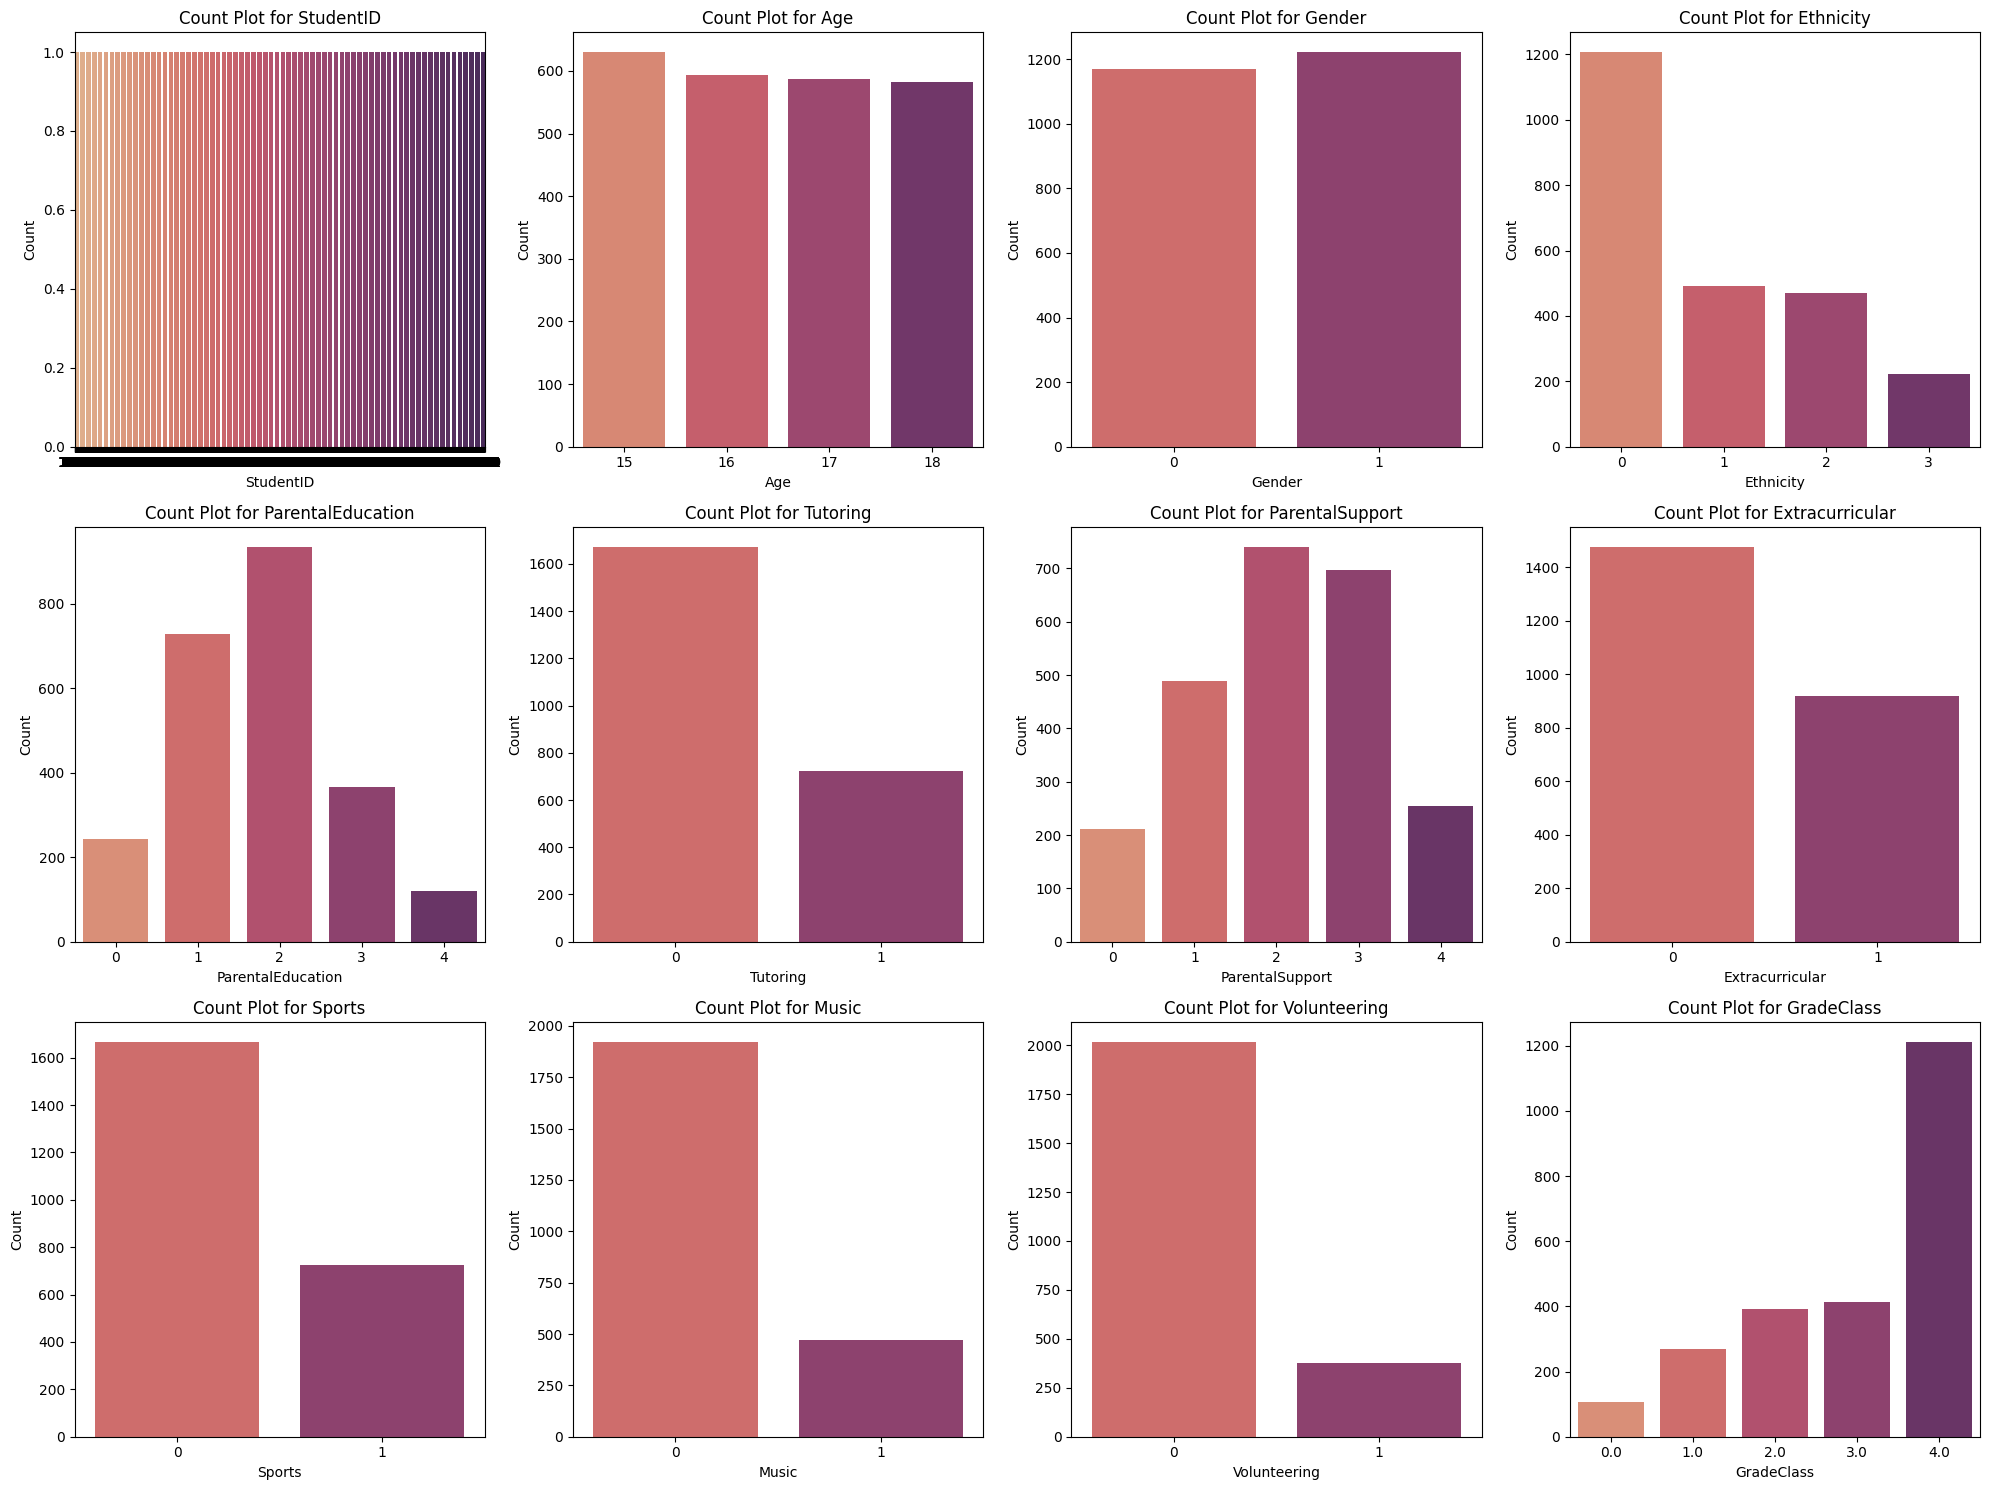

In [16]:
countplots = df.drop(columns=['Absences', 'StudyTimeWeekly','GPA'])
columns = countplots.columns

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = ax.flatten()

for i, column in enumerate(columns):
    sns.countplot(x=column, data=df, ax=axs[i], palette='flare')
    axs[i].set_title(f'Count Plot for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

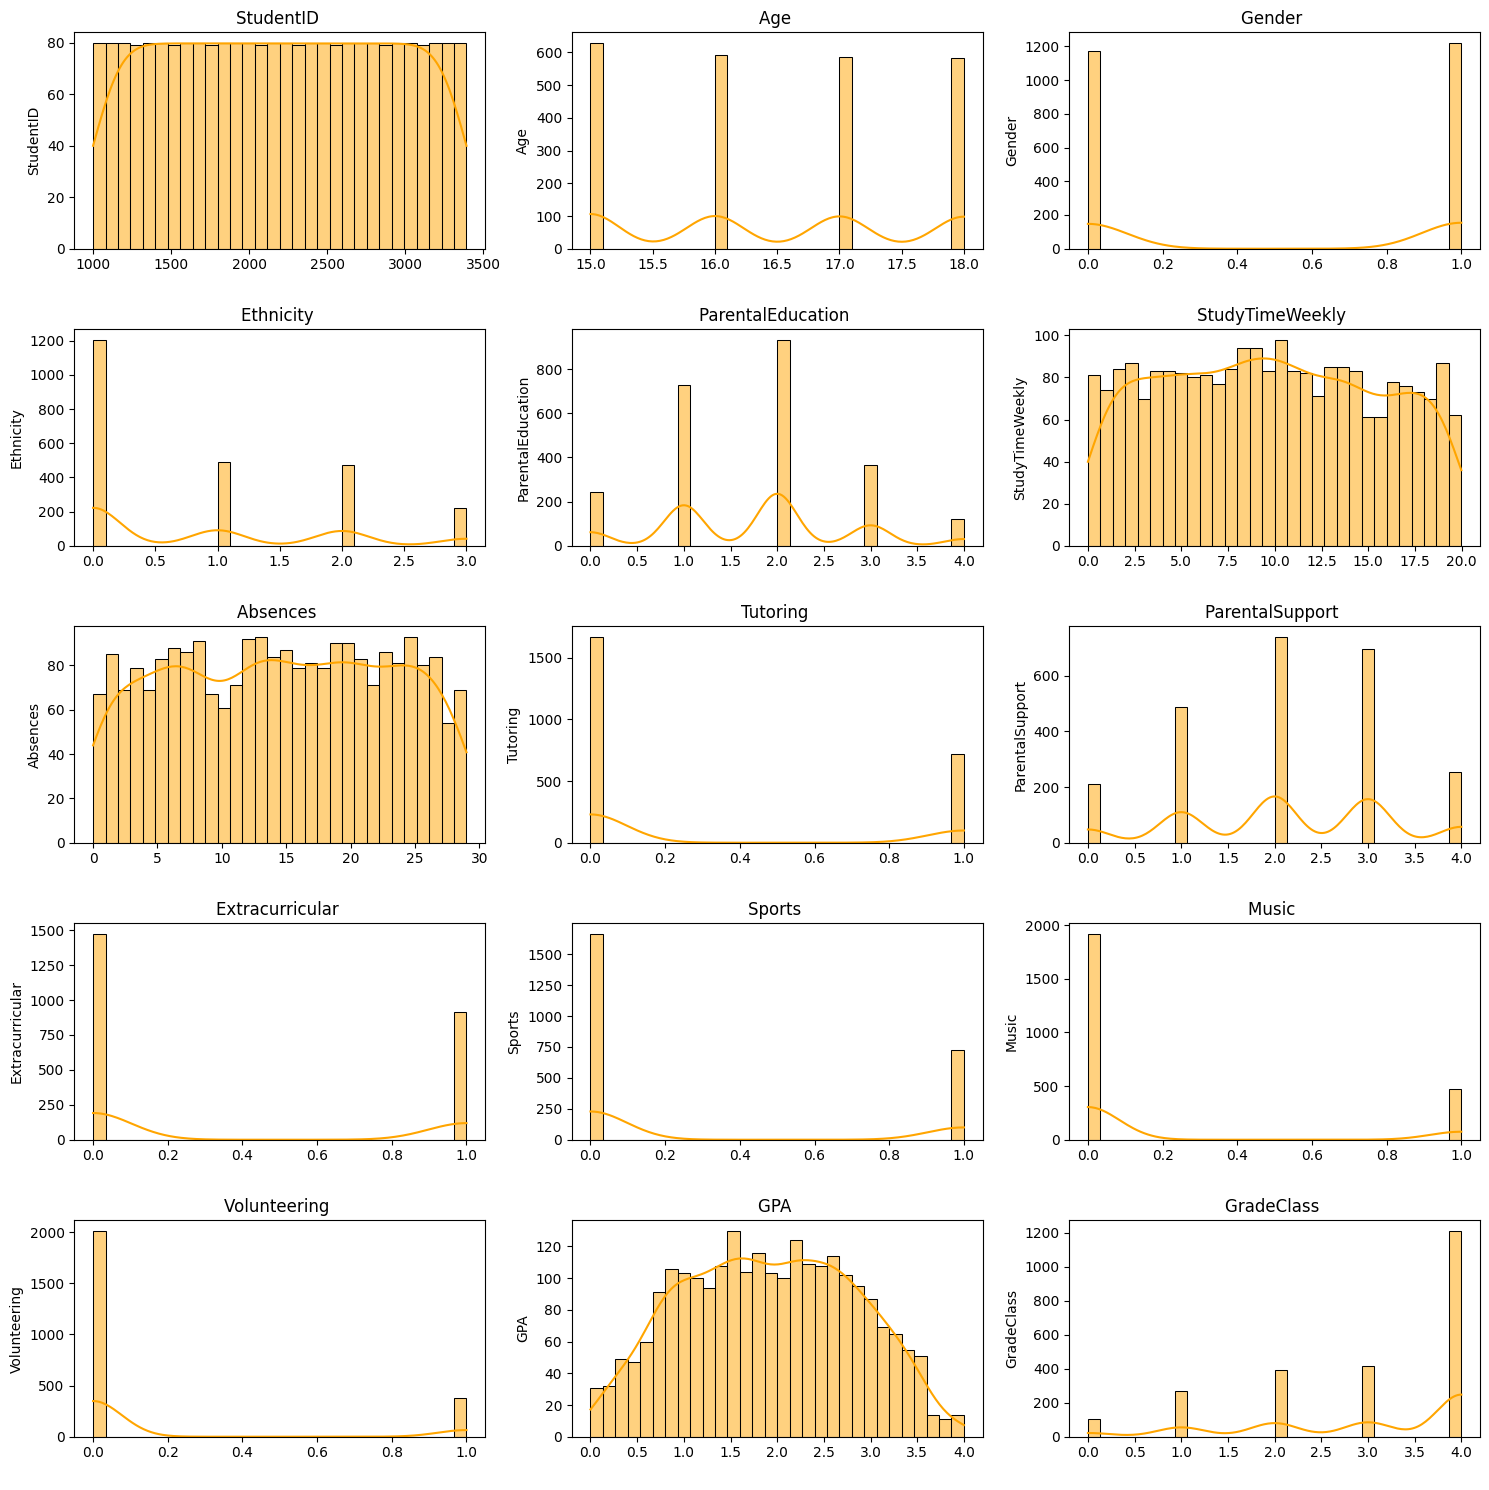

In [17]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='orange')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

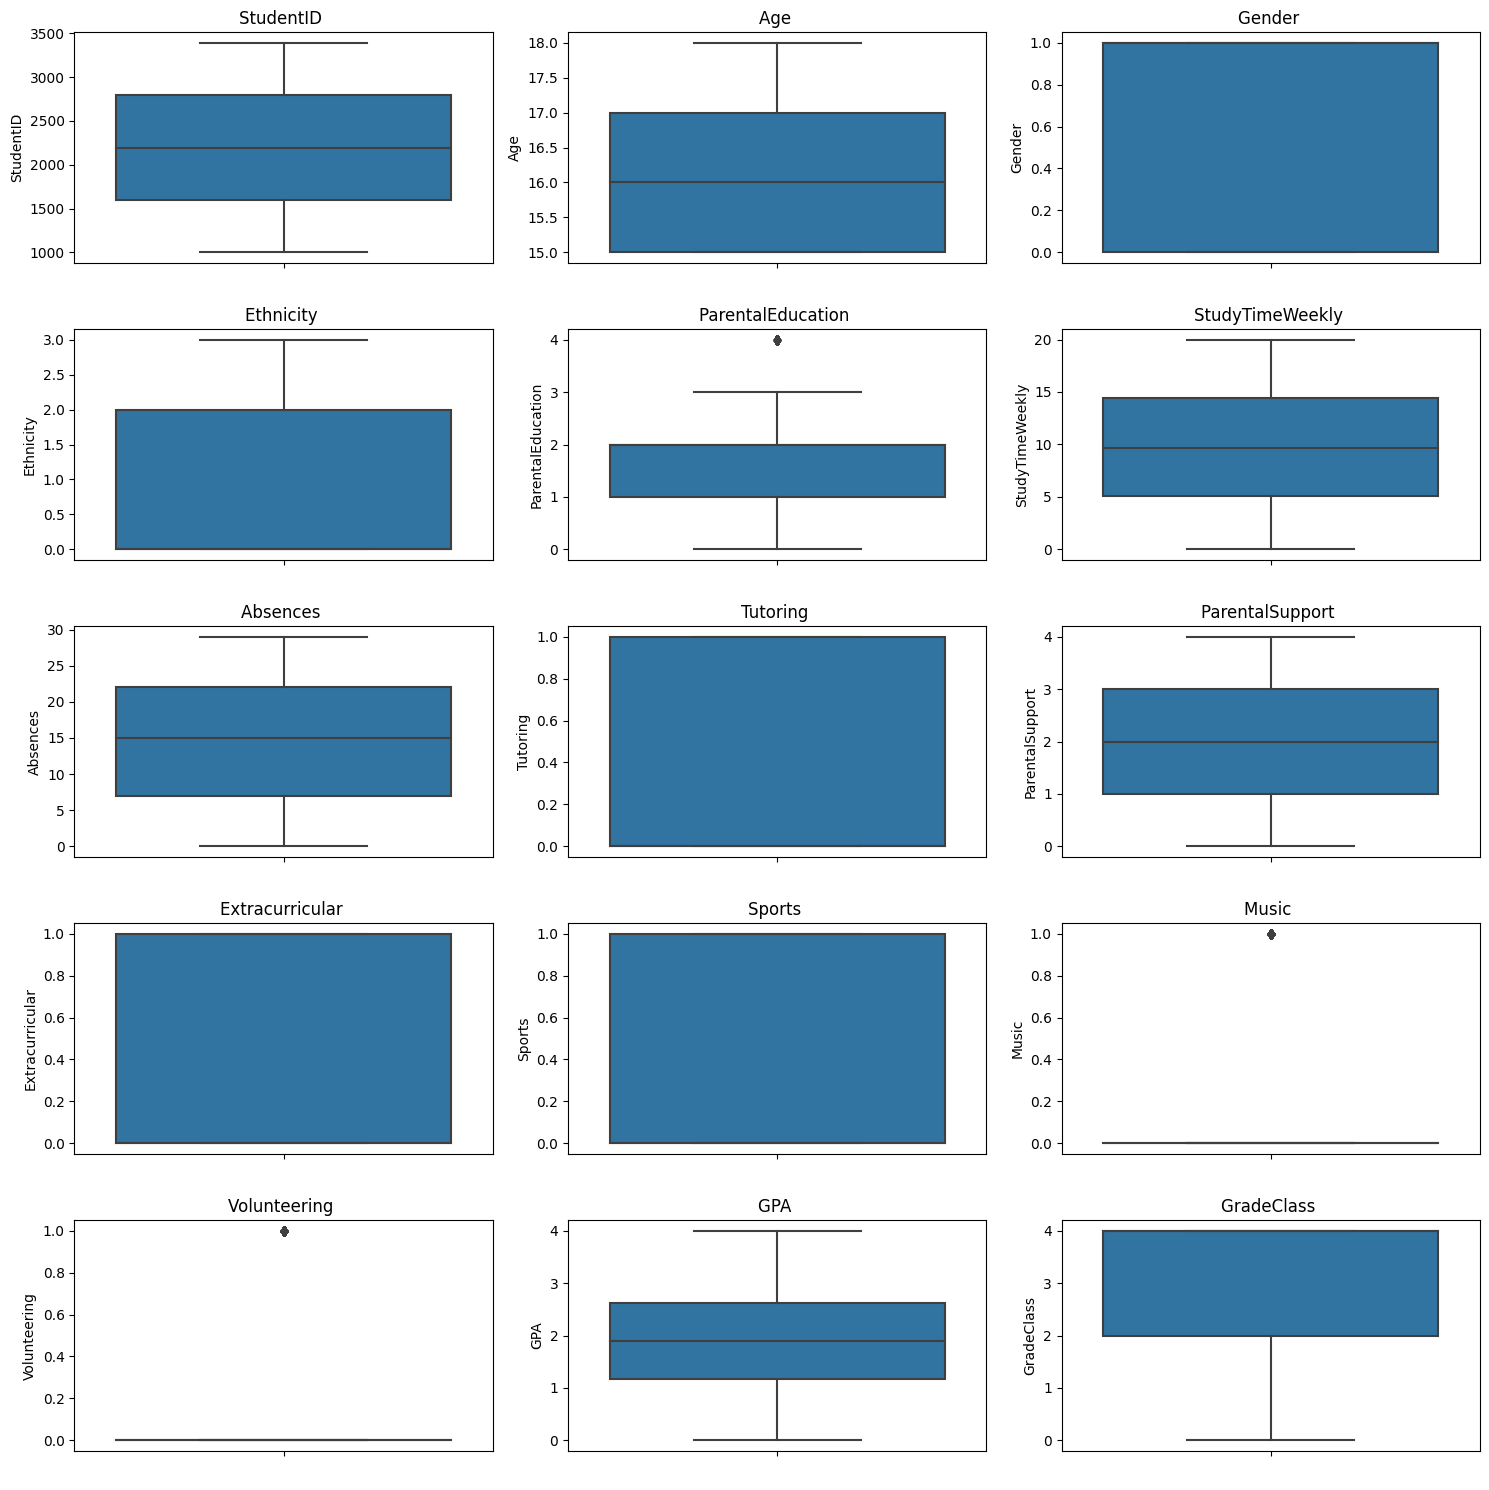

In [18]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

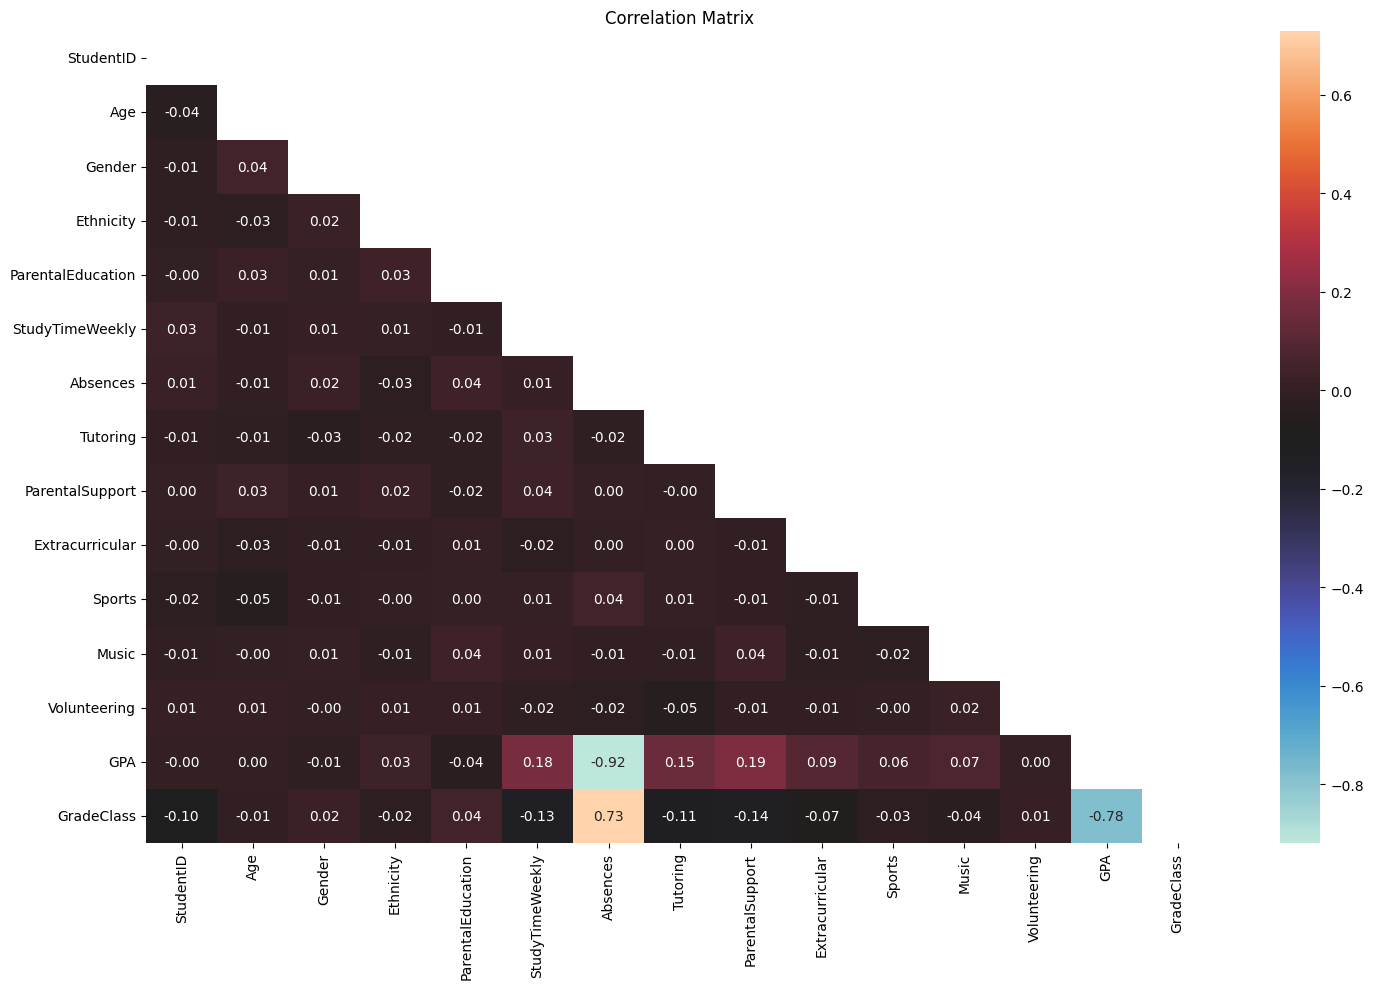

In [19]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [20]:
palette = sns.color_palette("viridis", as_cmap=True)

corr.style.background_gradient(cmap=palette)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
StudentID,1.000000,-0.042255,-0.014625,-0.012990,-0.002307,0.026976,0.014841,-0.007834,0.003016,-0.003611,-0.020703,-0.005468,0.008011,-0.002697,-0.098500
Age,-0.042255,1.000000,0.044895,-0.028473,0.025099,-0.006800,-0.011511,-0.012076,0.033197,-0.025061,-0.046320,-0.003492,0.013074,0.000275,-0.006250
Gender,-0.014625,0.044895,1.000000,0.016010,0.006771,0.011469,0.021479,-0.031597,0.008065,-0.005964,-0.008897,0.007109,-0.000200,-0.013360,0.022998
Ethnicity,-0.012990,-0.028473,0.016010,1.000000,0.033595,0.007184,-0.025712,-0.017440,0.020922,-0.008927,-0.004484,-0.014627,0.013468,0.027760,-0.023326
ParentalEducation,-0.002307,0.025099,0.006771,0.033595,1.000000,-0.011051,0.036518,-0.017340,-0.017463,0.007479,0.002029,0.039439,0.011960,-0.035854,0.041031
StudyTimeWeekly,0.026976,-0.006800,0.011469,0.007184,-0.011051,1.000000,0.009326,0.028930,0.035800,-0.022860,0.006836,0.007791,-0.016604,0.179275,-0.134131
Absences,0.014841,-0.011511,0.021479,-0.025712,0.036518,0.009326,1.000000,-0.015534,0.002108,0.000360,0.041454,-0.008692,-0.018528,-0.919314,0.728633
Tutoring,-0.007834,-0.012076,-0.031597,-0.017440,-0.017340,0.028930,-0.015534,1.000000,-0.000824,0.004865,0.006278,-0.011385,-0.050898,0.145119,-0.111695
ParentalSupport,0.003016,0.033197,0.008065,0.020922,-0.017463,0.035800,0.002108,-0.000824,1.000000,-0.008381,-0.006176,0.035122,-0.006036,0.190774,-0.136823
Extracurricular,-0.003611,-0.025061,-0.005964,-0.008927,0.007479,-0.022860,0.000360,0.004865,-0.008381,1.000000,-0.011820,-0.014191,-0.007427,0.094078,-0.069733


In [21]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [22]:
x=df.drop(['StudentID','GradeClass'],axis=1)
y=df['GradeClass']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Logistic Regression Accuracy: 0.6764091858037579
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.53      0.42      0.47        62
         2.0       0.42      0.66      0.52        73
         3.0       0.42      0.13      0.19        87
         4.0       0.82      0.99      0.90       242

    accuracy                           0.68       479
   macro avg       0.44      0.44      0.42       479
weighted avg       0.63      0.68      0.63       479

------------------------------------------------------------
Support Vector Machine Accuracy: 0.7954070981210856
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29        15
         1.0       0.62      0.55      0.58        62
         2.0       0.61      0.73      0.66        73
         3.0       0.74      0.67      0.70        87
         4.0       0.92      0.96      0.94       242

    accuracy           

<Axes: >

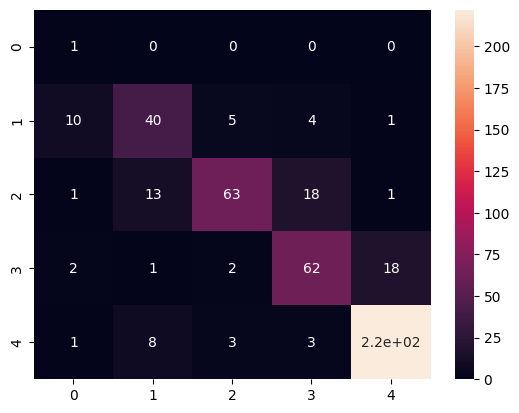

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm ,annot=True)